<a href="https://colab.research.google.com/github/imanekn/Fake-News-Detection/blob/main/Fake_News_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import string
import re
import torch
import nltk
from torch import nn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
from google.colab import drive
#drive.mount('/content/drive')

In [3]:
from google.colab import files
uploaded = files.upload()


Saving Data-FakeRealCOVID.xlsx to Data-FakeRealCOVID.xlsx


In [52]:
data = pd.read_excel('Data-FakeRealCOVID.xlsx')


In [5]:
data.head()

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,real
1,2,States reported 1121 deaths a small rise from ...,real
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,5,Populous states can generate large case counts...,real


In [6]:
data.describe()

,id
count,6420.000000
mean,3210.500000
std,1853.438696
min,1.000000
25%,1605.750000
50%,3210.500000
75%,4815.250000
max,6420.000000


In [7]:
data.dtypes

id        int64
tweet    object
label    object
dtype: object

In [8]:
#Check if there are any missing values
data.isna().sum()

id       0
tweet    0
label    0
dtype: int64

In [9]:
#Remove missing data
data.dropna()

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,real
1,2,States reported 1121 deaths a small rise from ...,real
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,5,Populous states can generate large case counts...,real
...,...,...,...
6415,6416,A tiger tested positive for COVID-19 please st...,fake
6416,6417,???Autopsies prove that COVID-19 is??� a blood...,fake
6417,6418,_A post claims a COVID-19 vaccine has already ...,fake
6418,6419,Aamir Khan Donate 250 Cr. In PM Relief Cares Fund,fake


Plotting


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(8,7)})

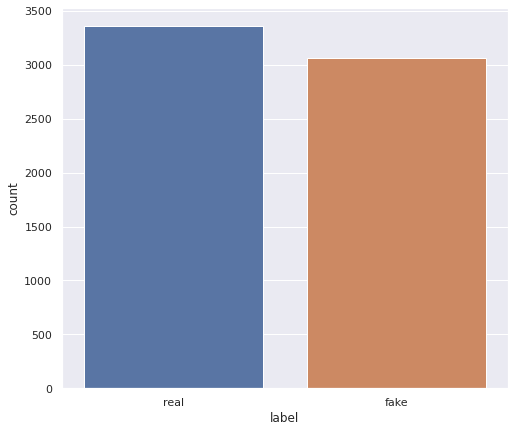

In [11]:
sns.countplot(x='label', data=data)

### **DATA CLEANING**





In [12]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [13]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

*Using the function below, we will clean our text :*

In [55]:
def clean(text):

  lemmatizer = WordNetLemmatizer()
  stop_words = stopwords.words('english')

  #Lowercase
  text = text.lower()

  #Removing punctuation
  text = text.translate(str.maketrans('', '', string.punctuation))
  
  #Removing Non Alpha Numeric characters 
  text = re.sub('[^a-zA-Z]+', ' ', text) 

  #Removing urls
  text = re.sub(r'https.+', '', text, flags=re.MULTILINE)
  
  
  words = [x for x in text.split(" ") if len(x)>1]
  #Removing usernames
  words = [x for x in words if x[0] is not "@"]

  #Removing tags
  words = [x for x in words if x[0] is not "#"]

  #Removing stopwords
  words = [x for x in words if x  not in stop_words]

  #Lemmatization
  words = [lemmatizer.lemmatize(x) for x in words if len(x)>1 ]

  return words


In [56]:
def preprocess(x):
  x = x.apply(lambda x : clean(x))

  y = x.copy(deep=True)
  for i in range (y.shape[0]):
    y[i] = " ".join(x[i])
  return y

In [54]:
data = pd.read_excel('Data-FakeRealCOVID.xlsx')

In [17]:
data["tweet"][1595]

'https://t.co/HcGWx8897G California fires, camel racing, coronavirus tribute; The World in Photos, Sept. 28 https://t.co/vmEP0HhNbC https://t.co/4KvZ8FEWPX'

In [57]:
data["tweet"] = preprocess(data["tweet"])

In [59]:
data["tweet"][1595]

''

In [60]:
#Loading preprocessed data
data.to_csv("Data-FakeRealCOVID.csv", index=False)

### **Feature Extraction**



In [61]:
df = pd.read_csv("Data-FakeRealCOVID.csv")


In [62]:
row_has_NaN = df.isnull().any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN 

,id,tweet,label
412,413,NaN,real
1595,1596,NaN,fake


In [63]:
df = df.dropna()

In [64]:
x = df["tweet"]
y = df["label"]
# Splitting data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [65]:
df.head()

,id,tweet,label
0,1,cdc currently report death general discrepancy...,real
1,2,state reported death small rise last tuesday s...,real
2,3,politically correct woman almost us pandemic e...,fake
3,4,indiafightscorona covid testing laboratory ind...,real
4,5,populous state generate large case count look ...,real


In [68]:
#Creation of TF-IDF Object
tfidf_vectorizer = TfidfVectorizer(stop_words="english")

#Transform the train dataset 
tfidf_train = tfidf_vectorizer.fit_transform(x_train)

#Transform the test dataset 
tfidf_test = tfidf_vectorizer.fit_transform(x_test)

In [69]:
tfidf_vectorizer.get_feature_names()


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aaj',
 'aampe',
 'aampes',
 'ababa',
 'abating',
 'abbott',
 'abcworldnews',
 'abia',
 'abide',
 'ability',
 'able',
 'ableg',
 'abortion',
 'aboveremained',
 'abraham',
 'abscbn',
 'absent',
 'absentee',
 'absolute',
 'absolutely',
 'absorbed',
 'ac',
 'aca',
 'acc',
 'accelerate',
 'accelerating',
 'accelerator',
 'accepted',
 'access',
 'accommodation',
 'accompanies',
 'according',
 'accordingly',
 'account',
 'accounted',
 'accredited',
 'accurately',
 'accusing',
 'acetylcysteine',
 'achieve',
 'achieved',
 'achievement',
 'achieving',
 'acid',
 'acquire',
 'acquired',
 'act',
 'action',
 'activated',
 'active',
 'activecases',
 'actively',
 'activity',
 'actor',
 'actress',
 'actual',
 'actually',
 'acute',
 'acutely',
 'adaab',
 'adamawa',
 'adamjkucharski',
 'adammccu',
 'adapted',
 'add',
 'added',
 'adding',
 'addis',
 'addition',
 'additional',
 'additive',
 'address',
 'adequate',
 'adhaan',
 'adiabo',
 'adjust',
 'adjustment',
 'administer',
 'administered',
 'administr

In [70]:
len(tfidf_vectorizer.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


4543

In [73]:
tfidf_train

<5134x9989 sparse matrix of type '<class 'numpy.float64'>'
	with 66729 stored elements in Compressed Sparse Row format>

In [29]:
class ResNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.l1 = nn.Linear(16*3, 50)
    self.l2 = nn.Linear(50, 50)
    self.do = nn.Dropout(0.1)
    self.l3 = nn.Linear(50, 10)
  def forward(self, x):
    h1 = nn.functional.relu(self.l1(x))
    h2 = nn.functional.relu(self.l2(h1))
    do = self.do(h2 + h1)
    output = self.l3(do)
    return output

model = ResNet()